In [2]:
# !pip install numpy scipy matplotlib wave

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import Organ.readwav as readwav

In [3]:
rate, array = readwav.readwav("./Organ/note_1.wav")
print("rate: ", rate)

rate:  48000


In [4]:
# play the sound
from IPython.display import Audio

Audio(array[:, 0]
       * signal.windows.taylor(len(array[:, 0]))
         ,rate=rate)

In [5]:
freq, PSD = signal.periodogram(array[:, 0], fs=rate, 
                               window="blackman",
                               )

(-10.0, 10.0)

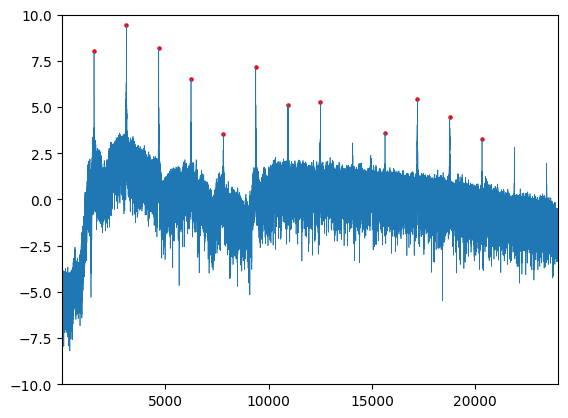

In [6]:

plt.plot(freq, np.log10(PSD),    lw=0.5,)
peaks, _ = signal.find_peaks(np.log10(PSD), height=3.1, distance = 5000)

plt.scatter(freq[peaks], np.log10(PSD[peaks]), c='r', s=5)
plt.xlim(20, rate / 2)
plt.ylim(-10, 10)

In [106]:
log_freq = np.log2(freq[peaks])

np.round((log_freq[1:] - log_freq[:-1]) * 12)

array([12.,  7.,  5.,  4.,  3.,  3.,  2.,  4.,  2.,  2.,  1.])

In [108]:
np.diff(freq[peaks])

array([1563.13950023, 1563.13950023, 1563.13950023, 1563.71747749,
       1563.13950023, 1562.56152297, 1563.86197181, 3126.27900046,
       1563.28399455, 1563.42848886, 1562.99500592])

In [ ]:
# To generate the frequency scale

55 * 2**(np.arange(0, 80, ) /12)

array([  55.        ,   58.27047019,   61.73541266,   65.40639133,
         69.29565774,   73.41619198,   77.78174593,   82.40688923,
         87.30705786,   92.49860568,   97.998859  ,  103.82617439,
        110.        ,  116.54094038,  123.47082531,  130.81278265,
        138.59131549,  146.83238396,  155.56349186,  164.81377846,
        174.61411572,  184.99721136,  195.99771799,  207.65234879,
        220.        ,  233.08188076,  246.94165063,  261.6255653 ,
        277.18263098,  293.66476792,  311.12698372,  329.62755691,
        349.22823143,  369.99442271,  391.99543598,  415.30469758,
        440.        ,  466.16376152,  493.88330126,  523.2511306 ,
        554.36526195,  587.32953583,  622.25396744,  659.25511383,
        698.45646287,  739.98884542,  783.99087196,  830.60939516,
        880.        ,  932.32752304,  987.76660251, 1046.5022612 ,
       1108.73052391, 1174.65907167, 1244.50793489, 1318.51022765,
       1396.91292573, 1479.97769085, 1567.98174393, 1661.21879

In [ ]:
filtered_frequencies = []
for fr in main_frequencies:
    if all(abs(fr - existing_freq) >= 20 for existing_freq in filtered_frequencies):
        filtered_frequencies.append(fr)

main_frequencies = filtered_frequencies






# Sort the filtered frequencies
sorted_filtered_frequencies = sorted(main_frequencies)
print(sorted_filtered_frequencies)
frequency_distances = np.diff(sorted_filtered_frequencies)
frequency_distances[frequency_distances > 30]






l = np.array([1,2,3,4,6,8,10,14,18,22, 23, 24, 26, 28, 30])
indexes = np.diff(l)>=2
ll = l[:-1]
lr = l[1:]
list(zip(ll[indexes], lr[indexes]))




plt.figure(figsize=(10, 6))
plt.plot(freq, 10 * np.log10(PSD), lw=0.5)
plt.title("Periodogram")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (dB)")

# Mark the main frequencies with red lines
for f in main_frequencies:
    plt.axvline(x=f, color='red', linestyle='--', linewidth=0.8)
plt.xlim(0, rate / 2)
plt.grid()
plt.show()





plt.plot(freq, np.log10(PSD),   lw=0.5,)
plt.xlim(20, rate / 2)
plt.ylim(-10, 10)



#for each elemment in main_frequencies add it to filtered_frequencies if it's 20 apart from all elements already in filtered